In [1]:
import pandas as pd
import numpy as np

In [20]:
df = pd.read_csv(
    "../data/chicago,il.csv",
    usecols=["date_time", "chicago,il_maxtempC", "chicago,il_mintempC"],
)
df = df.rename(
    columns={"chicago,il_maxtempC": "maxtemp", "chicago,il_mintempC": "mintemp"}
)
df["date_time"] = pd.to_datetime(df["date_time"])
df = df.set_index("date_time")
df.head()

,maxtemp,mintemp
date_time,,
2018-12-11 00:00:00,1,-2
2018-12-11 03:00:00,1,-2
2018-12-11 06:00:00,1,-2
2018-12-11 09:00:00,1,-2
2018-12-11 12:00:00,1,-2


<Axes: >

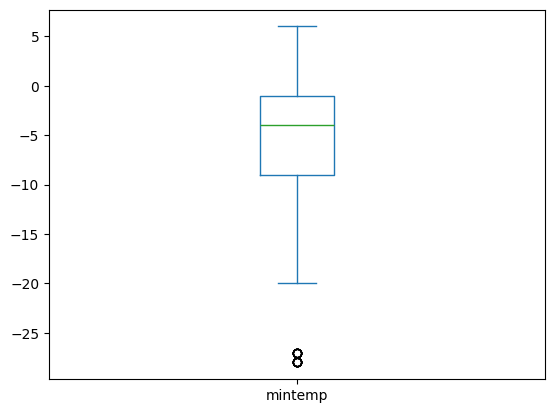

In [ ]:
# box and whisker plot of the minimum temperature
(
    df["mintemp"].plot(
        kind="box",
    )
)

In [19]:
# which values are the outliers in the boxplot?
iqr = df["mintemp"].quantile(0.75) - df["mintemp"].quantile(0.25)
df.query(
    "(mintemp < mintemp.mean() - @iqr * 1.5) | (mintemp > mintemp.mean() + @iqr * 1.5)"
)

,maxtemp,mintemp
date_time,,
2019-01-25 00:00:00,-15,-20
2019-01-25 03:00:00,-15,-20
2019-01-25 06:00:00,-15,-20
2019-01-25 09:00:00,-15,-20
2019-01-25 12:00:00,-15,-20
2019-01-25 15:00:00,-15,-20
2019-01-25 18:00:00,-15,-20
2019-01-25 21:00:00,-15,-20
2019-01-26 00:00:00,-10,-19


<Axes: >

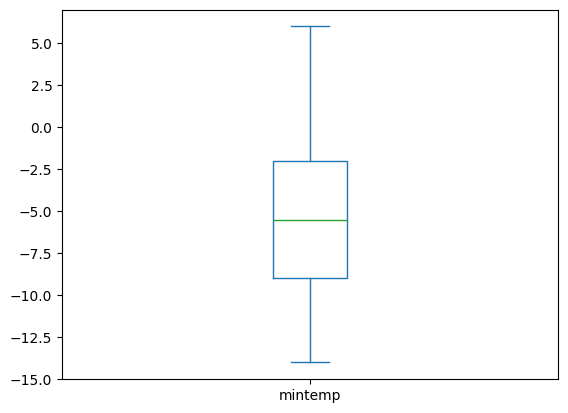

In [24]:
# boxplot of Chicago min temperatures in February
(df.loc["2019-02-01":"2019-02-28", "mintemp"].plot(kind="box"))

<Axes: >

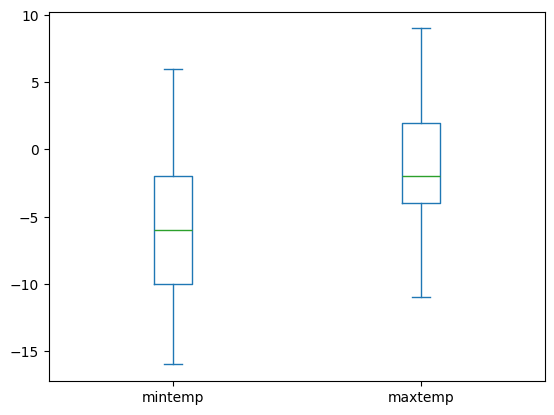

In [ ]:
# side by side box plots of minimum and maximum temperatures in February and March
(df.loc["2019-02-01":"2019-03-31", ["mintemp", "maxtemp"]].plot(kind="box"))

In [50]:
files = ["chicago,il", "boston,ma", "los+angeles,ca"]
df3 = pd.concat(
    [
        pd.read_csv(
            f"../data/{fn}.csv",
            header=0,
            usecols=[0, 1, 2],
            names=["date_time", "maxtemp", "mintemp"],
            parse_dates=["date_time"],
        ).assign(city=fn.replace("+", "_").split(",")[0])
        for fn in files
    ]
)
df3.describe()

,date_time,maxtemp,mintemp
count,2184,2184.000000,2184.000000
mean,2019-01-25 10:29:59.999999744,6.395604,0.805861
min,2018-12-11 00:00:00,-25.000000,-28.000000
25%,2019-01-02 17:15:00,0.000000,-5.000000
50%,2019-01-25 10:30:00,4.000000,0.000000
75%,2019-02-17 03:45:00,15.000000,9.000000
max,2019-03-11 21:00:00,23.000000,17.000000
std,NaN,9.060953,8.522280


In [37]:
df3.groupby("city").describe()

maxtemp                                                     \
              count       mean       std   min   25%   50%   75%   max   
city                                                                     
boston        728.0   2.868132  4.945277 -12.0   0.0   2.0   6.0  17.0   
chicago       728.0  -0.736264  6.128985 -25.0  -3.0   0.0   3.0   9.0   
los_angeles   728.0  17.054945  2.708640  12.0  15.0  16.0  19.0  23.0   

            mintemp                                                    
              count       mean       std   min  25%   50%   75%   max  
city                                                                   
boston        728.0  -3.142857  4.957195 -14.0 -6.0  -3.0   0.0   9.0  
chicago       728.0  -5.076923  6.255857 -28.0 -9.0  -4.0  -1.0   6.0  
los_angeles   728.0  10.637363  2.705200   4.0  9.0  11.0  12.0  17.0

maxtemp       Axes(0.125,0.11;0.352273x0.77)
mintemp    Axes(0.547727,0.11;0.352273x0.77)
dtype: object

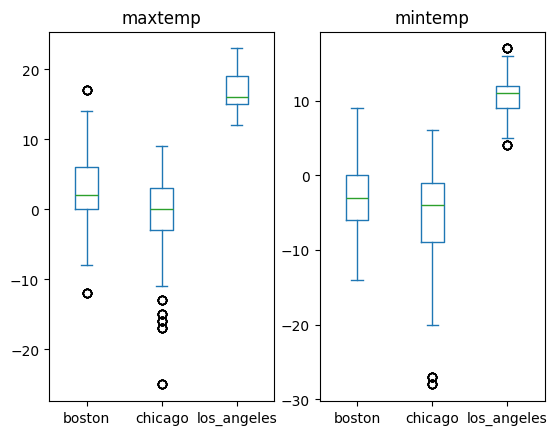

In [42]:
(df3.plot(kind="box", by="city"))

# Extension questions
1. Rather than starting with data from Chicago, begin with an empty data frame and use a for loop to load data for all three cities.
2. For each city, calculate the mean and median for `mintemp` and `maxtemp`. Are they the same (or even close)? If they're different, in which direction are they pulled?
3. Create a line plot showing the minimum temperatures in each city. The `x` axis should show dates, the `y` axis should show temperatures, and each line should represent a different city.

In [49]:
# 1. use a for loop to load data into an empty dataframe for all three cities
files = ["chicago,il", "boston,ma", "los+angeles,ca"]
dfe = pd.DataFrame()
for fn in files:
    dfe = pd.concat(
        [
            dfe,
            pd.read_csv(
                f"../data/{fn}.csv",
                usecols=[0, 1, 2],
                names=["date_time", "maxtemp", "mintemp"],
                header=0,
                parse_dates=["date_time"],
            ).assign(city=fn.replace("+", "_").split(",")[0]),
        ]
    )
dfe.describe()

,date_time,maxtemp,mintemp
count,2184,2184.000000,2184.000000
mean,2019-01-25 10:29:59.999999744,6.395604,0.805861
min,2018-12-11 00:00:00,-25.000000,-28.000000
25%,2019-01-02 17:15:00,0.000000,-5.000000
50%,2019-01-25 10:30:00,4.000000,0.000000
75%,2019-02-17 03:45:00,15.000000,9.000000
max,2019-03-11 21:00:00,23.000000,17.000000
std,NaN,9.060953,8.522280


In [59]:
# 2. for each city calculate the mean and median for maxtemp and mintemp
dfe.groupby("city")[["mintemp", "maxtemp"]].agg(["mean", "median"])

mintemp           maxtemp       
                  mean median       mean median
city                                           
boston       -3.142857   -3.0   2.868132    2.0
chicago      -5.076923   -4.0  -0.736264    0.0
los_angeles  10.637363   11.0  17.054945   16.0

<Axes: xlabel='date_time'>

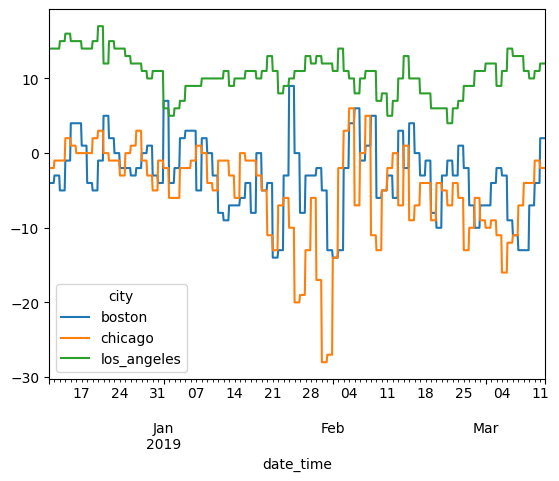

In [58]:
# 3. line plot of minimum temperatures for each city
(dfe.pivot(index="date_time", columns="city", values="mintemp").plot(kind="line"))

city
boston         Axes(0.125,0.11;0.775x0.77)
chicago        Axes(0.125,0.11;0.775x0.77)
los_angeles    Axes(0.125,0.11;0.775x0.77)
Name: mintemp, dtype: object

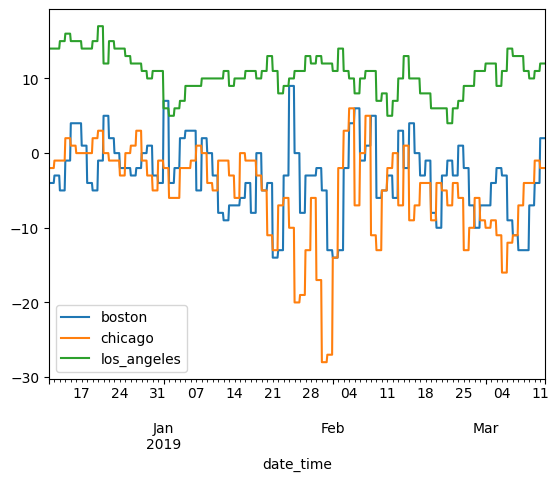

In [62]:
# book version (I added the set_index, which makes the x axis not just a plain number)
dfe.set_index("date_time").groupby("city")["mintemp"].plot.line(legend=True)